## This short notebook is team 828's notebook for the 3rd task in Data Overflow's DataQuest competition. It's image classification.
## With this notebook we ranked 8th in this task.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/abdous-egg-experiment/sample_submission.csv
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/_394_1321417.jpg
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/_253_643151.jpg
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/_101_5139882.jpg
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/_314_8133392.jpg
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/_275_3439882.jpg
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/cataract_065.png
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/_279_4656331.jpg
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/_269_5232883.jpg
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/_326_1274700.jpg
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/2170_left.jpg
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/2116_left.jpg
/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1/_392_3084035.jpg
/kaggle/input/abdous-egg-experiment/dataset/datas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Simple data augmentation through a horizontal flip

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,)

In [ ]:
import cv2
import os
import pandas as pd

# Directory containing the images
image_dir = '/kaggle/input/abdous-egg-experiment/dataset/test'

# List to store image filenames and flattened pixel values
image_data = []
filenames=[]
# Iterate over each image file in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read image
        image = cv2.imread(os.path.join(image_dir, filename), cv2.IMREAD_GRAYSCALE)
        filenames.append(filename)
        resized_image = image.resize(64,64)
        # Flatten image into 1D array
        flattened_image = image.flatten()
        # Append filename and flattened image to list
        image_data.append({'Filename': filename, 'Pixels': flattened_image})

# Convert list of dictionaries to DataFrame
dft = pd.DataFrame(image_data)

test = pd.DataFrame(dft['Pixels'].apply(lambda x: x.flatten()).tolist())


# CNN

In [41]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [42]:
##### import cv2
import os
import pandas as pd
from PIL import Image
# Directory containing the images
image_dirs = ['/kaggle/input/abdous-egg-experiment/dataset/dataset/day_1','/kaggle/input/abdous-egg-experiment/dataset/dataset/day_2','/kaggle/input/abdous-egg-experiment/dataset/dataset/day_3','/kaggle/input/abdous-egg-experiment/dataset/dataset/day_4']

filenames = []
# List to store image filenames and flattened pixel values
train_images = []
y= []
c = 0
for image_dir in image_dirs:
    c=c+1
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            # Read image
            img = Image.open(os.path.join(image_dir, filename))
            filenames.append(filename)
            y.append(c)
            # Resize the image to 32x32
            img_resized = img.resize((64, 64))           
            train_images.append(img_resized)



In [43]:
train_labels = np.array(y)

train_labels = train_labels-1

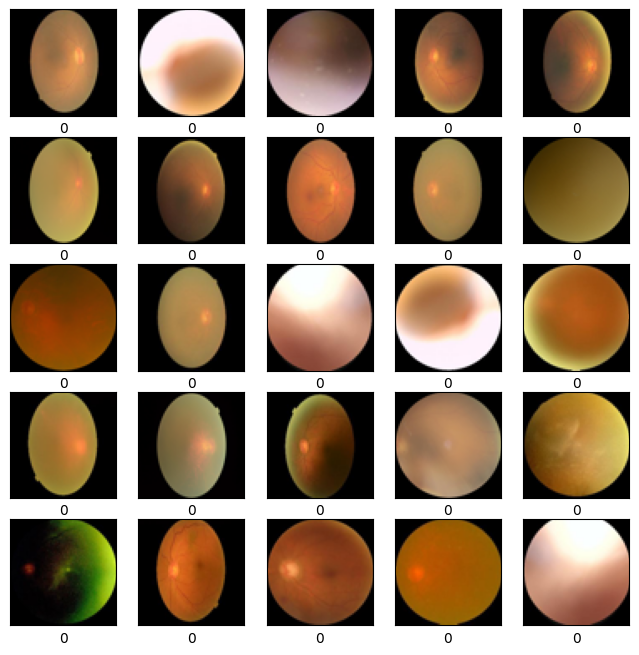

In [44]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

In [47]:
model3 = models.Sequential()
model3.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(4,activation='softmax'))

In [48]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 62, 62, 256)       7168      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 29, 29, 256)       590080    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 256)       590080    
                                                                 
 flatten_5 (Flatten)         (None, 36864)            

## Reshaping images for uniformity and faster training

In [49]:
from tensorflow.keras.utils import to_categorical

train = []
for img in train_images:
    img = np.asarray(img)
    img = img.reshape(64,64,3)
    img_array = np.array(img)
    img_array = img_array / 255.0 
    train.append(img_array)

import tensorflow as tf
train = tf.stack(train)
train_labels = tf.stack(train_labels)
train.shape


TensorShape([3798, 64, 64, 3])

In [50]:
train_labels

<tf.Tensor: shape=(3798,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

## Training

In [57]:
# Adam is the best among the adaptive optimizers in most of the cases
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model3.fit(datagen.flow(train, train_labels, batch_size=1),epochs=100)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3798/3798 [==============================] - 21s 5ms/step - loss: 1.1862 - accuracy: 0.3965
Epoch 2/100
3798/3798 [==============================] - 19s 5ms/step - loss: 0.8187 - accuracy: 0.5927
Epoch 3/100
3798/3798 [==============================] - 19s 5ms/step - loss: 0.7252 - accuracy: 0.6603
Epoch 4/100
3798/3798 [==============================] - 19s 5ms/step - loss: 0.6834 - accuracy: 0.6796
Epoch 5/100
3798/3798 [==============================] - 19s 5ms/step - loss: 0.6543 - accuracy: 0.7059
Epoch 6/100
3798/3798 [==============================] - 19s 5ms/step - loss: 0.6253 - accuracy: 0.7125
Epoch 7/100
3798/3798 [==============================] - 19s 5ms/step - loss: 0.6075 - accuracy: 0.7241
Epoch 8/100
3798/3798 [==============================] - 19s 5ms/step - loss: 0.5939 - accuracy: 0.7325
Epoch 9/100
3798/3798 [==============================] - 19s 5ms/step - loss: 0.5803 - accuracy: 0.7343
Epoch 10/100
3798/3798 [==============================] - 19s 5ms/step - los

## Processing the test images

In [53]:
import cv2
import os
import pandas as pd
from PIL import Image
# Directory containing the images
image_dirs = ['/kaggle/input/abdous-egg-experiment/dataset/test']
test_images = []
filenames= []

for filename in os.listdir(image_dirs[0]):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Read image
        img = Image.open(os.path.join(image_dirs[0], filename))
        
        filenames.append(filename)
        # Resize the image to 32x32
        img_resized = img.resize((64, 64))           
        test_images.append(img_resized)

test = []
for img in test_images:
    img = np.asarray(img)
    img = img.reshape(64,64,3)
    img_array = np.array(img)
    img_array = img_array / 255.0 
    test.append(img_array)

import tensorflow as tf

test = tf.stack(test)
test.shape

TensorShape([419, 64, 64, 3])

In [58]:
y_pred3 = model3.predict(test)
y_pred3 = pd.DataFrame(y_pred3)
max_class_column = y_pred3.idxmax(axis=1)
result3 = pd.DataFrame({'target': max_class_column})
result3["target"] = result3["target"]+1
result3.insert(0,'ID',filenames)
result3.to_csv('cnn3rd100.csv', index=False) 
result3

14/14 [==============================] - 0s 10ms/step


,ID,target
0,659a59ed-7de3-49d0-a221-fcd3e8e98472.jpg,1
1,2b8d806a-725b-485e-ab56-23895c62c611.jpg,3
2,a7c5b872-2d08-498b-a850-14db0862ec73.jpg,4
3,9f680b03-1d00-4648-836a-736296113f69.jpg,3
4,a6c918c0-eef9-482b-a286-0f86ba19876e.jpg,2
...,...,...
414,7ef7031e-2ac4-475f-b65e-1f79d35ce06c.jpg,4
415,b3e36f46-9dfd-4a26-a71c-0e58714cd83a.jpg,2
416,4e411c98-ec9c-40e5-b461-4fbb3bd8cd79.jpg,4
417,d8ac69bc-9854-4ef7-bc53-97b61efa31bf.jpg,4


In [ ]:
result3.to_csv('cnnLast3.csv', index=False) 